Populating the interactive namespace from numpy and matplotlib


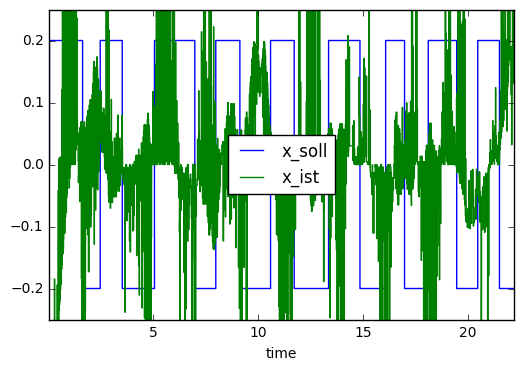

In [14]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
%pylab inline
#plt.rcParams['figure.figsize'] = (15, 15)

### get soll ###
df_soll = pd.read_csv('~/catkin_ws/src/pitasc/applications/sysident/step_log/tmp/x_soll_ur5.log',
                 header=0,
                 names=['time', 'x_soll'])
#print df_soll.head()

#remove trailing [
df_soll = df_soll.set_index('time')

### get ist ###
df_ist = pd.read_csv('~/catkin_ws/src/pitasc/applications/sysident/step_log/tmp/x_ist_ur5.log',
                 header=0,
                 names=['time', 'x_ist'])
df_ist = df_ist.set_index('time')

### make one df with ist and soll; indexed by time
# Concates both series to one and fills (unknown) data with last valid one
df_ist_soll = pd.concat([df_soll.x_soll, df_ist.x_ist], axis=1).fillna(method='pad')
# Fills first value with 0 (there is no valid before that one)
df_ist_soll = df_ist_soll.fillna(0)
df_ist_soll.plot(ylim=[-0.25, 0.25], style='-', drawstyle="steps")

In [20]:
# Load in the r magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [32]:
T = df_ist_soll.index.tolist()
yout = (5 * df_ist_soll['x_ist']).tolist()
xin = (5 * df_ist_soll['x_soll']).tolist()

# Don't know how to import more than one per line...
%R -i T
%R -i yout
%R -i xin

Discrete-time ARX mod: A(z)y[k] = B(z)u[k] + e[k] 

A(q^{-1}) = 1	- 0.8444 (+/- 0.0251) q^{-1}	
B(q^{-1}) = 5e-04	 + 5e-04 (+/- 0.0244) q^{-1}	


 Fit Characteristics 
       MSE      FPE FitPer   AIC   AICc   nAIC   BIC
1 0.001278 0.001302  52.98 -1229 -92.49 -6.644 -1218


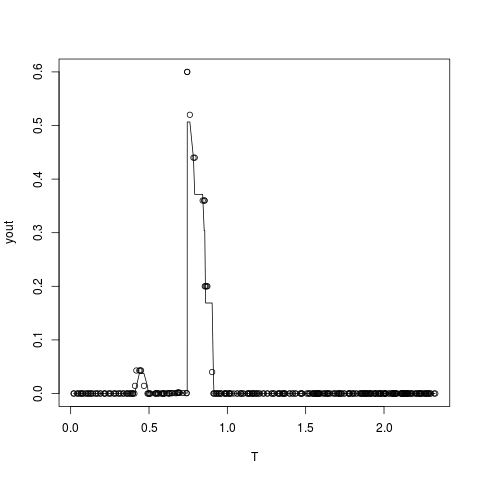

In [33]:
%%R -o sys
library(sysid)
require(ggplot2)

data_tf <- idframe(output = yout, input = xin)
sys = arx(data_tf, c(1,2,0))
#ls()
#names(sys)
#sys['fitted.values']
plot(T, yout)
lines(T, predict(sys, data_tf, nahead=1))
#print(sys)
names(sys)
print(sys)